In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

character(0)

#### How to Conduct a One-Way ANOVA in R : Aov() function
A one-way ANOVA is used to determine whether or not there is a statistically significant difference between the means of three or more independent groups.

This type of test is called a one-way ANOVA because we are analyzing how one predictor variable impacts a response variable.
- **Note**: If we were instead interested in how two predictor variables
impact a response variable, we could conduct a two-way ANOVA.
How to Conduct a One-Way ANOVA in R

##### Example:
**Background**
Suppose we want to determine if three different exercise programs impact weight loss differently.

The predictor variable we’re studying is exercise program and the response variable is weight loss,
measured in pounds.

We can conduct a one-way ANOVA to determine if there is a statistically significant difference between the resulting weight loss from the three programs.

We recruit 90 people to participate in an experiment in which we randomly assign 30 people to follow either program A, program B, or program C for one month.

The following code creates the data frame we’ll be working with:


#### 1. Dataset

In [ ]:
#make this example reproducible
set.seed(0)
#create data frame
data <- data.frame(program = rep(c("A", "B", "C"), each = 30),
                   weight_loss = c(runif(30, 0, 3),
                                   runif(30, 0, 5),
                                   runif(30, 1, 7)))
#view first six rows of data frame
head(data)

,program,weight_loss
,<chr>,<dbl>
1,A,2.6900916
2,A,0.7965260
3,A,1.1163717
4,A,1.7185601
5,A,2.7246234
6,A,0.6050458


#### 2. Exploring the Data
Before we even fit the one-way ANOVA model, we can gain a better understanding of the data by finding the mean and standard
deviation of weight loss for each of the three programs using the dplyr package:

In [ ]:
library(dplyr)
#find mean and standard deviation of weight loss for each treatment group
data %>%
 group_by(program) %>%
 summarise(mean = mean(weight_loss),
 sd = sd(weight_loss))

program,mean,sd
<chr>,<dbl>,<dbl>
A,1.584292,0.9050638
B,2.562033,1.2385145
C,4.129694,1.5683145


- We can also create a boxplot for each of the three programs to visualize the distribution of weight loss for each program:

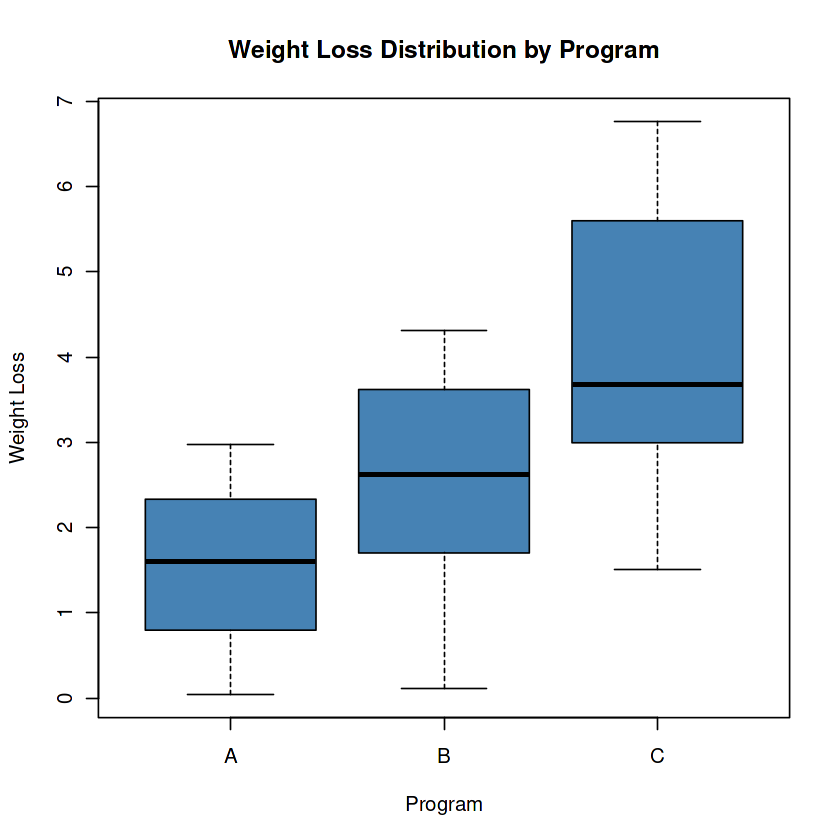

In [ ]:
#create boxplots
boxplot(weight_loss ~ program,
data = data,
main = "Weight Loss Distribution by Program",
xlab = "Program",
ylab = "Weight Loss",
col = "steelblue",
border = "black")

- Just from these boxplots we can see that the mean weight loss is highest for the participants in Program C and the mean weight loss is lowest for the participants in Program A.
- We can also see that the standard deviation (the “length” of the boxplot) for weight loss is quite a bit higher in Program C compared to the other two programs.
- Next, we’ll fit the one-way ANOVA model to our data to see if these visual differences are actually statistically significant.

#### 3. Fitting the One-Way ANOVA Model

In [ ]:
# aov(response variable ~ predictor_variable, data = dataset) -- syntax
# Fit the one-way ANOVA model
# using weight_loss as the response variable and program as our predictor variable.
model <- aov(weight_loss ~ program, data = data)
#view the model output
summary(model)

            Df Sum Sq Mean Sq F value   Pr(>F)    
program      2  98.93   49.46   30.83 7.55e-11 ***
Residuals   87 139.57    1.60                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

- P value being small (**7.55e-11**) means we reject the null hypothesis
- This means that there is a statistically significant difference between the mean weight loss that results from the three programs.

#### 4. Checking the Model Assumptions
Before we go any further, we should check to see that the assumptions of our model are met so that the our results from the
model are reliable. In particular, a one-way ANOVA assumes:

1. Independence:
- the observations in each group need to be independent of each other.
- Since we used a randomized design (i.e. we assigned participants to the exercise programs randomly), this assumption should be met so we don’t need to worry too much about this.

2. Normality:
- the dependent variable should be approximately normally distributed for each level of the predictor variable.

3. Equal Variance:
- the variances for each group are equal or approximately equal.
- One way to check the assumptions of normality and equal variance is to use the function plot(), which produces four model-checking plots.
- In particular, we are most interested in the following two plots:

4. Residuals vs Fitted:
- this plot shows the relationship between the residuals and the fitted values.

- We can use this plot to roughly gauge whether or not the variance between the groups is approximately equal.

5. Q-Q Plot
- this plot displays the standardized residuals against the theoretical quantiles.

- We can use this plot to roughly gauge whether or not the normality assumption is met.


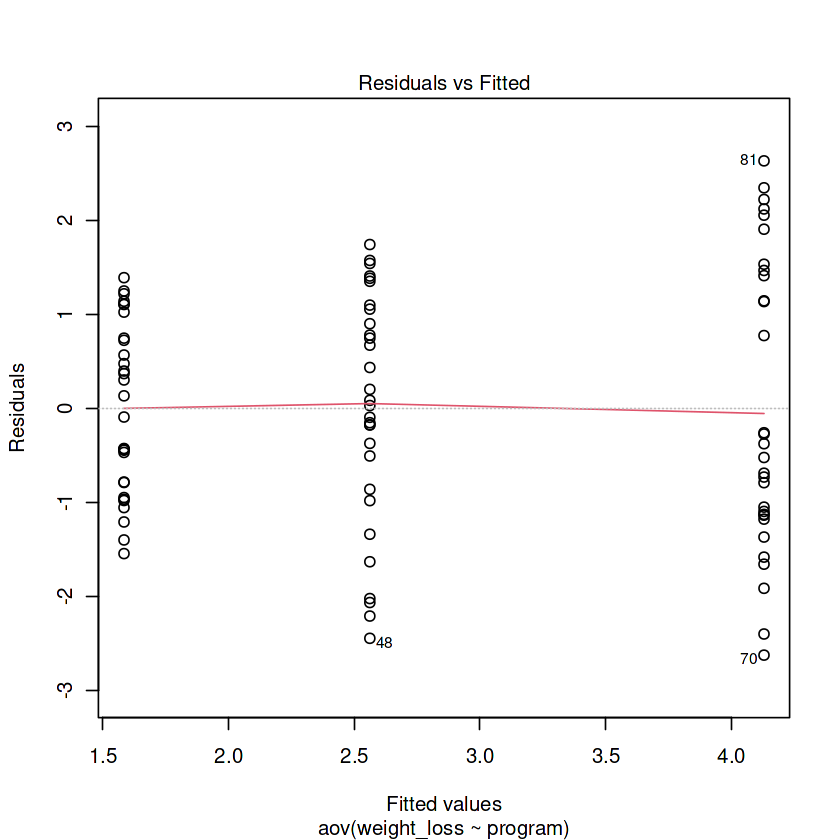

hat values (leverages) are all = 0.03333333
 and there are no factor predictors; no plot no. 5



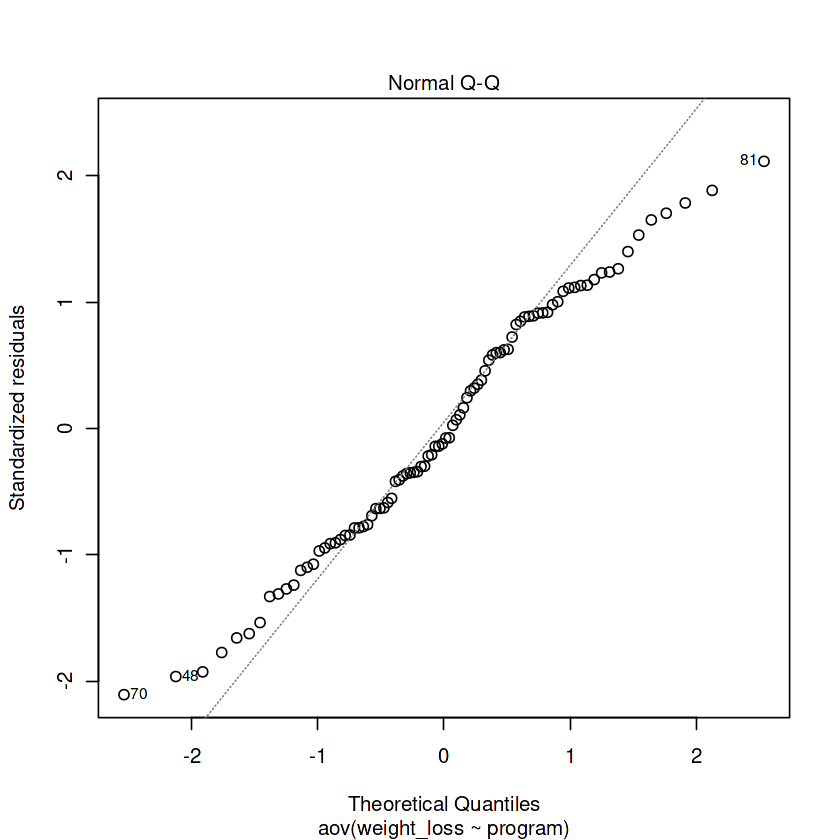

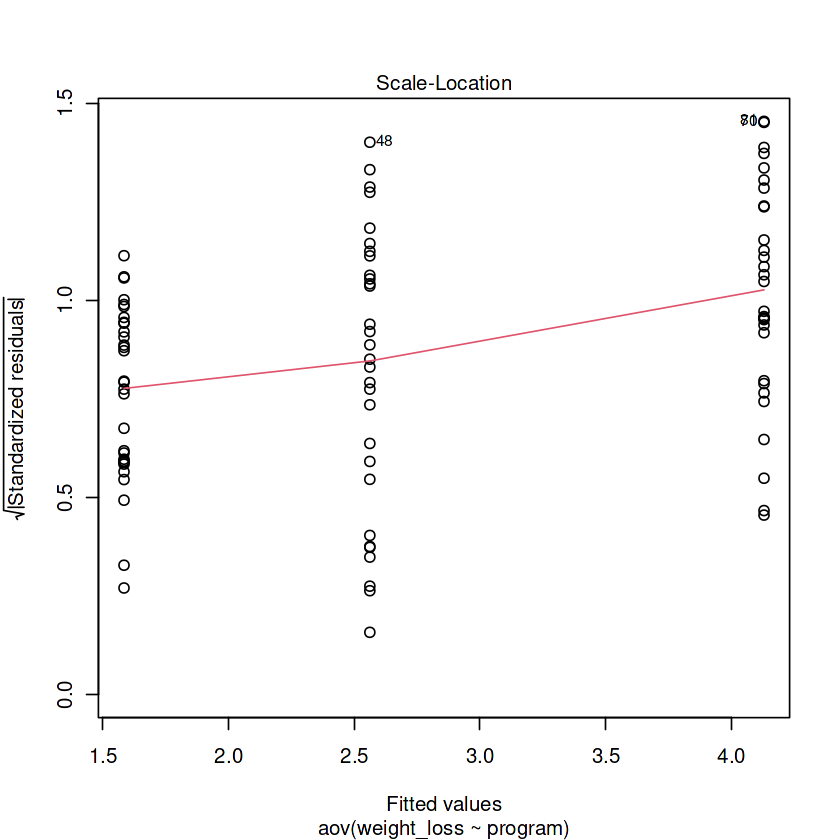

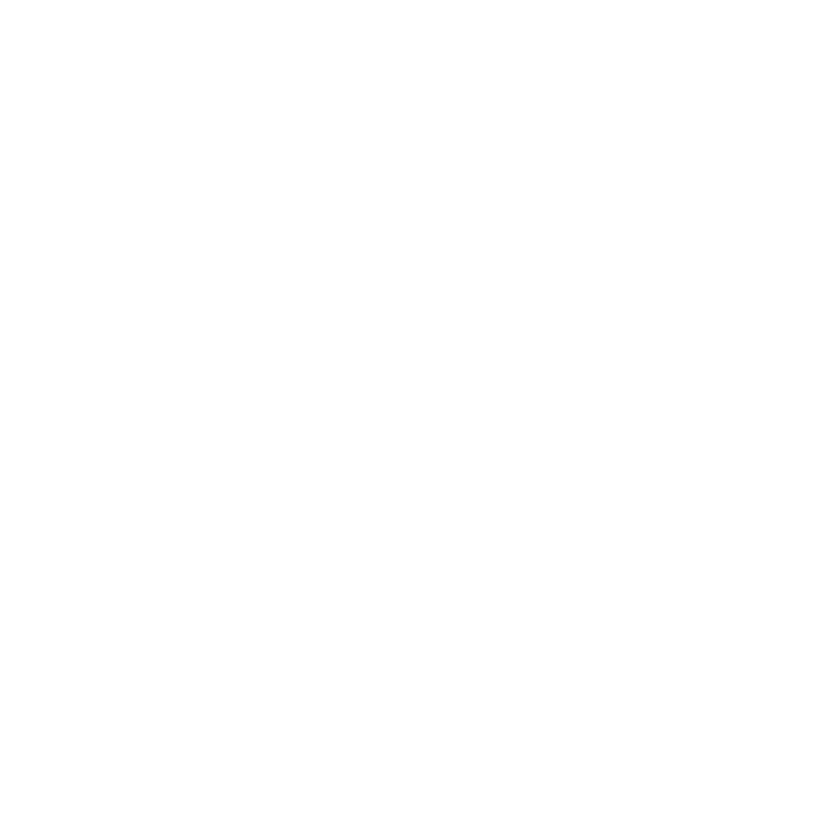

In [ ]:
plot(model)

#### 5. To formally test for equal variances, we could Levene’s Test using the car package:

In [ ]:
install.packages("pbkrtest")
install.packages('car')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘lme4’, ‘numDeriv’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘carData’, ‘abind’, ‘quantreg’




In [ ]:
library(car)
#conduct Levene's Test for equality of variances
leveneTest(weight_loss ~ program, data = data)

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,4.171574,0.01862065
,87,NA,NA


In [ ]:
#perform Tukey's Test for multiple comparisons
TukeyHSD(model, conf.level=.95)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = weight_loss ~ program, data = data)

$program
         diff       lwr      upr     p adj
B-A 0.9777414 0.1979466 1.757536 0.0100545
C-A 2.5454024 1.7656076 3.325197 0.0000000
C-B 1.5676610 0.7878662 2.347456 0.0000199
